<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Alcázar
- Nombre de alumno 2: Gianina Salomó


### **Link de repositorio de GitHub:** `https://github.com/alcazar90/sci-prog-lab`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
%%capture
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [2]:
df_retail = pd.read_pickle("https://github.com/alcazar90/sci-prog-lab/blob/main/data/online_retail_II.pickle?raw=true")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)

print(f'Número de filas: {df_retail.shape[0]}\nNúmero de columnas: {df_retail.shape[1]}')
print(f"Visualización de los datos:")
df_retail.head()

Número de filas: 525461
Número de columnas: 8
Visualización de los datos:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Los atributos que componen el dataset son:**
- Description
- Quantity
- InvoiceDate
- Price
- Country

**Columnas que conforman el dataset y tipo de variable presente en cada columna:**

In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [4]:
print(
    f'% Facturas canceladas: {round((df_retail[df_retail["Invoice"].astype(str).str.contains("C")].shape[0] / df_retail.shape[0]) * 100, 2)}'
)

% Facturas canceladas: 1.94


**Comente qué representa cada columna**

Para ello se consulta la <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail+II">documentación</a> asociada al set de datos.

- `Invoice`: Número de factura. Corresponde a un número entero de 6 dígitos, que se asigna en forma única a cada transacción. Si el código comienza con la letra "C", indica una cancelación.
- `StockCode`: Código del producto (ítem). Corresponde a un número entero de 5 dígitos, que se asigna en forma única a cada producto diferente.
- `Description`: Nombre del producto (ítem).
- `Quantity`: Las cantidades de cada producto (ítem) por transacción. 
- `InvoiceDate`: Fecha y hora de la factura. Corresponde al día y hora cuando se generó una transacción.
- `Price`: Precio unitario. Precio por unidad de producto en libras esterlinas.
- `Customer ID`: Número del cliente. Corresponde a un número entero de 5 dígitps asignado en forma única a cada cliente.
- `Country`: Nombre del país. Corresponde al país de residencia del cliente.

**Nulos**

In [5]:
df_retail.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**
- **Análisis univariado:** Explorar en forma gráfica las distribuciones individuales de las variables, ya sea a través de histogramas, curvas de densidad, gráficos de caja y/o gráficos de violín para variables continuas, o gráficos de barra para categóricas. También corresponde a la obtención de estadísticos como media, desviación estandar, mínimo, máximo, y/o percentiles para el caso de variables continuas, o moda para variables categóricas.
- **Análisis multivariado:** Explorar la relación o asociación conjunta de 2 o más variables. Por ejemplo, es posible ver la relación entre dos variables
continuas a través de un _scatter plot_. Es importante destacar que es
posible análizar más de 2 dimensiones a través tablas de contingencia o facet plots. Las primeras sirven para explorar dos variables categóricas, mientras que los segundos aplican una misma visualización a distintos
subgrupos que pueden ser conformados por las categorías de una variable
categórica o los grupos que se forman entre dos de estas variables. Para casos no supervisados, permite visualizar posibles grupos o clusters según el comportamiento conjunto de dos o más variables.
- **Datos faltantes**: Corresponde a datos de los que se desconoce su valor asociado a un atributo específico. En Python, pueden representarse como `np.nan`, `np.nat`, `None`, entre otros. 

El beneficio que otorga estudiar estos datos es para tomar decisiones frente a la relevancia de algunos atributos respecto de otros en cuanto a su asociación con una variable de interés para la cual se podría realizar un modelo estadístico descriptivo y/o predictivo. Además, las distribuciones univariadas y exploración de nulos permiten tomar decisiones sobre el tratamiento de estos últimos; Si una columna tiene pocos datos nulos, mediante el análisis univariado se puede decidir la forma de imputación (media, percentil, etc). En cambio, si el % de nulos en una columna es alto, se puede decidir eliminar este atributos del análisis posterior.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [7]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

In [8]:
df_retail[df_retail["Price"] >0]["Price"].describe()

count    521771.000000
mean          4.983703
std          96.832587
min           0.001000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64

In [9]:
print(f'% Datos con precio negativo: {round(df_retail[df_retail["Price"]<0].shape[0] / df_retail.shape[0] * 100, 5)}%')
print(f'N° Datos con precio negativo: {df_retail[df_retail["Price"]<0].shape[0]}')
print(f'N° Datos con precio 0: {df_retail[df_retail["Price"]==0].shape[0]}')

% Datos con precio negativo: 0.00057%
N° Datos con precio negativo: 3
N° Datos con precio 0: 3687


**Análisis de la primera serie (Price)**

Llama la atención la presencia de precios con valores negativos (3 datos), o con precio 0 (3.687 datos).

Se observa que el rango de precios es muy variable, entre 0.001 libras (omitiendo los precios iguales o menores a 0), y 25.111 libras. Esto se traduce en una distribución sesgada hacia la izquierda (con sesgo positivo), siendo el precio promedio bajo (4.7 considerando todos los valores), pero mayor que el de la mediana (2.1 considerando todos los valores). Esto se debe (promedio mayor a la mediana) debido a la presencia de valores de precios muy altos que se escapan del rango de precios de la mayoría de los datos (notar que al percentil 75 el precio es de 4.2).

A su vez, la gran variabilidad de precios también se evidencia por el alto valor de la desviación estándar, de 146.

In [10]:
# Aplicamos la función para todas las columnas excepto Price que
# el gráfico se encuentra arriba...
(pd.concat([df_retail.loc[:, 'Invoice':'InvoiceDate'],
            df_retail.loc[:, 'Customer ID':'Country']], 
           axis=1)
  .apply(lambda x: profile_serie(x)))

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Invoice        None
StockCode      None
Description    None
Quantity       None
InvoiceDate    None
Customer ID    None
Country        None
dtype: object

**Análisis de la segunda serie (Invoice)**

Corresponde al ID de la boleta asociada a una transacción, 
por lo tanto toda observación tiene una boleta asociada.

Se reportan 28.816 transacciones diferentes, donde la mayor venta (en cuanto a cantidad de productos diferentes) contiene 675 tipos de productos distintos. 
Cada registro se encuentra separado el tipo de objeto que fue vendido, de hecho la mayoría de las observaciones no son únicas, solo hay un poco más del 1.5% de los registros que corresponden  a ventas de un solo tipo de producto. 

**Nota:** La estructura que se esta
ocupando para esta variable es `dtype=category`, lo que ahorra memoria versus que si se considerara esta variable como `object`.

**Análisis de la tercera serie (StockCode)**

Corresponde al código del producto (variable categórica). Todo producto tiene un código asociado, por lo que no se reportan valores nulos, y existen 4.632 productos diferentes.

Al analizar las frecuencias, se observa que el producto presente en mayor cantidad de ventas corresponde al producto de código 85123A, el cual está presente en 3.516 facturas. La presencia de este producto es atípicamente alta, ya que el segundo producto con mayor presencia en distintas facturas aparece en 2.221 facturas. El centésimo producto más frecuentes aparece en 689 facturas.

Solo existen 435 (0.08% de los datos) productos que aparecen en una sola factura.

**Análisis de la cuarta serie (Description)**

Corresponde al nombre del producto (variable categórica). No existe valores nulos, por lo que todos los productos cuentan con un nombre.

Se observa que la cantidad de nombres únicos de productos, 4.682, es mayor a la de códigos únicos, 4.632. Por tanto, se deduce que existen códigos que están asociados a más de 1 nombre de producto.

El nombre de producto presente en mayor cantidad de facturas es "WHITE HANGING HEART T-LIGHT HOLDER", con 3.549 ocurrencias, que también es levemente mayor a la frecuencia del código de producto más frecuente. 

Para las 100 Description más frecuentes, la distribución de frecuencias es similar a la del código producto, lo cual tiene sentido, ya que se espera una fuerte asociación entre estas dos variables, al explicar ambas la identificación de un producto.

**Análisis de la quinta serie (Quantity)**

Corresponde a la cantidad de productos comprados para un mismo producto específico en una venta (variable numérica entera). 

Al igual que para el caso del precio, llama la atención la presencia de valores negativos (2.35% de las cantidades).

Se observa que, incluso eliminando los valores _outliers_, la distribución es sesgada hacia la izquierda (sesgo positivo), concentrándose la mayor cantidad de cantidades de producto entre 0 y 1 producto (270 cantidades).

Se destaca también la presencia de una venta con cantidad de 19.152, pero considerando hasta el percentil 75 la mayoría de las cantidades son entre 1 y 10.

**Análisis de la sexta serie (InvoiceDate)**

Corresponde a la fecha de la venta. Se observa que las ventas se realizaron entre el primero de diciembre de 2009 y el 9 de diciembre de 2010, por lo que el periodo cubierto es de aproximadamente 1 año.

Debido a que solo se tiene 1 año, no es posible evaluar si existe estacionalidad u otras caaracterísticas de una serie temporal. Se debe destacar que probablemente el gráfico escogido no es el más apropiado para explorar el comportamiento de una serie temporal. Pareciera haber una cierta tendencia al aumento de ventas en el tiempo, pero no queda tan claro.

**Análisis de la séptima serie (Customer ID)**

Existen 4.383 únicos ID de clietes entre las ventas. Hay 107.927 registros (i.e. 20.54%) que no se encuentran asociados a un cliente (datos nulos).

**Análisis de la octava serie (Country)**

La mayoría de las observaciones se encuentran asociadas
a _United Kingdom_, correspondientes a un total de 485.852 registros (i.e. 92.46%). Los siguientes paises que lo siguen es Irlanda con 9670, luego Alemania con 8129, Francia con 5772, y el resto de las registros se reparten en 36 países que agrupan 16.038 filas.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [11]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

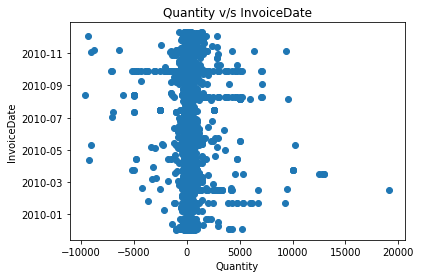

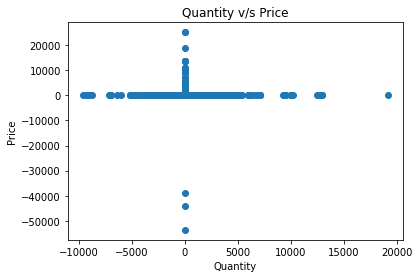

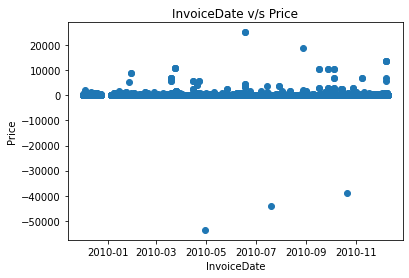

## Correlation:

## Missing Matrix:

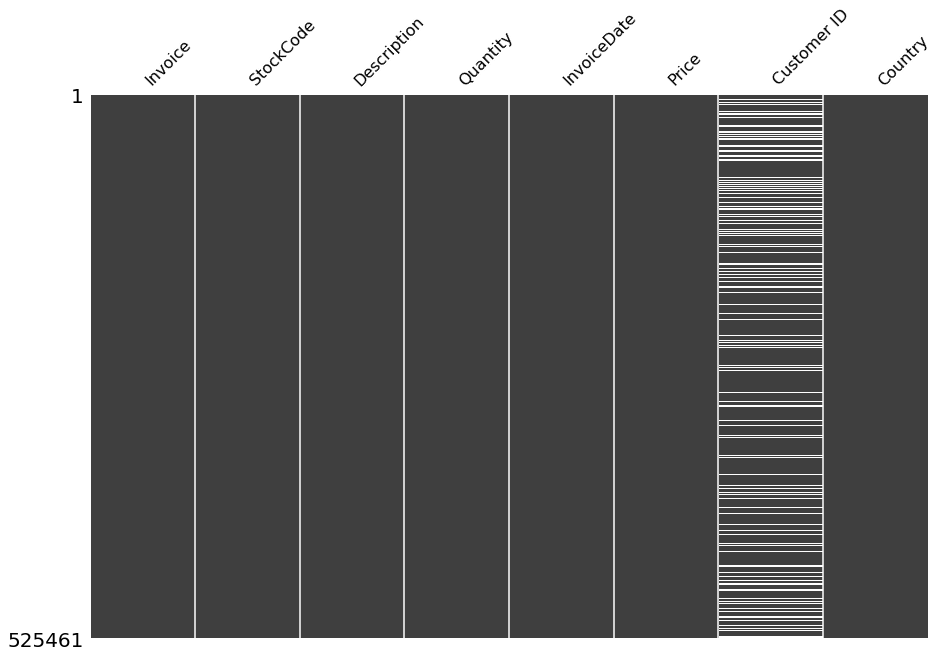

In [12]:
profile_df(df_retail)

**Observaciones:**


1. No se detecta asociaciones importantes con la variable precio y otras variables. **TODO**: Hay una fecha particular que tiene valores extremos,
o demasiado disasociados entre el precio y la cantidad, ver como se comportan
si filtramos estas observaciones. 
2. Destaca la gran cantidad de datos nulos presentes en la columna `CustomerId`, siendo esta además la única columna con datos nulos.
3. Dado lo anterior, y sumado a que no se. encuentran concentrados en algún
sector de las filas, no se determina ningún patrón que pueda explicar los datos
nulos en la columna `CustomerId`. Al menos, apartir de la visualización _missing matrix_.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

- Se considerará que un producto no puede tener precio negativo.
- Se considerará que un producto no puede tener cantidades negativas.
- Los casos en que no se cumpla esto, se reemplazará el valor original por `np.nan`.
- Los valores atípicos extremos (sobre el percentil 99%) para las variables quantity y price también se reemplazarán por nulos, por alejarse demasiado del rango de valores de la mayoría de datos.
- Se eliminan la columna de Customer ID por tener gran cantidad de nulos, ya que además su imputación es difícil por ser un identificador único del cliente, y no es una variable muy útil desde el punto de vista analítico de asociación al momento de identificar grupos.


Luego al realizar nuevamente el análisis univariado, las principales diferencias se dan, como era esperado, en las variables quantity y price, las cuales cambian su distribución disminuyendo el sesgo, el cual igual de todas formas se mantiene, solo que en menor medida.

In [13]:
def limpiar_df(
    data,
    columns_drop=["Customer ID"],
    columns_clean = ["Price", "Quantity"]
):
  # Selección de atributos
  df_proc = data.copy().drop(columns=columns_drop)

  # Se reemplaza por nulos
  for c in columns_clean:
    df_proc[columns_clean] = np.where(
        (df_proc[columns_clean] < 0)
        | (df_proc[columns_clean] > df_proc[columns_clean].quantile(.99)),
        np.nan,
        df_proc[columns_clean]
    )

  # Se explora nuevamente la frecuencia de nulos
  msno.matrix(df_proc);
  plt.title("Nulos previo a la limpieza")

  # Porcentaje de nulos previo a limpieza
  print("% Nulos previo a la limpieza")
  print(round(df_proc[columns_clean].isna().sum() / df_proc.shape[0] * 100, 2))

  return df_proc.dropna()

% Nulos previo a la limpieza
Price       1.84
Quantity    4.10
dtype: float64


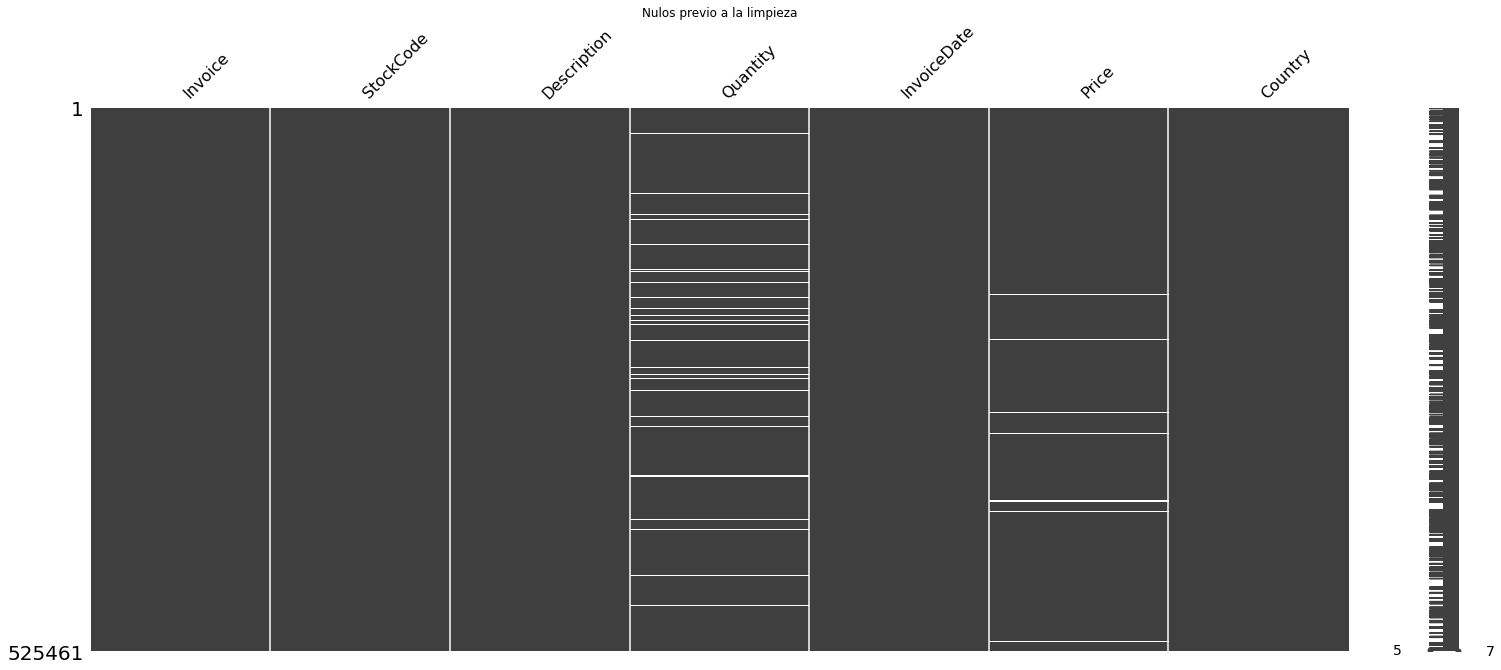

In [14]:
# Se limpia
df_proc = limpiar_df(df_retail)

In [15]:
# Se repite análisis univariado
df_proc.apply(lambda x: profile_serie(x))

## Invoice Profile

Type                           category
Number of observations           494870
Unique                            20767
Top                              537434
Freq                                650
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   492364
Duplicate rows (%)              99.49 %
Total size in memory      6236036 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           494870
Unique                             4229
Top                              85123A
Freq                               3339
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   494668
Duplicate rows (%)              99.96 %
Total size in memory      5117892 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                494870
Unique                                                  4459
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3373
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        494679
Duplicate rows (%)                                   99.96 %
Total size in memory                           7917920 bytes
dtype: object

## Quantity Profile

Type                            float64
Number of observations         494870.0
Mean                           7.328862
Std                           10.000047
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                                72.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          11.621627
Skew                           3.008192
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   494870
Duplicate rows (%)              100.0 %
Total size in memory      7917920 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           494870
Mean                      2010-06-29 02:43:46.645583616
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 15:23:00
50%                                 2010-07-07 11:21:00
75%                                 2010-10-17 11:58:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   493146
Duplicate rows (%)                              99.65 %
Total size in memory                      7917920 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         494870.0
Mean                           3.129088
Std                            2.768948
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                4.21
Max                               14.95
Negative                              0
Negative (%)                      0.0 %
Zeros                              1331
Zeros (%)                        0.27 %
Kurt                           2.958312
Skew                            1.72624
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   494792
Duplicate rows (%)              99.98 %
Total size in memory      7917920 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            494870
Unique                                40
Top                       United Kingdom
Freq                              459787
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    494870
Duplicate rows (%)               100.0 %
Total size in memory       7917920 bytes
dtype: object

Invoice        None
StockCode      None
Description    None
Quantity       None
InvoiceDate    None
Price          None
Country        None
dtype: object

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**
- Se debe tomar en cuenta que para este análisis se considerará como "producto único" (identificable) en base al _código de producto_ (`StockCode`). Es decir, si dos productos tienen distinto nombre, pero comparten el mismo código, se considerará que corresponden al mismo producto.
- Primero se calcula la cantidad total de ingresos por cada producto en cada factura, considerando su precio unitario y la cantidad vendida. 
- Luego se suma esta cantidad agrupando por producto, considerando todo el periodo disponible en los datos. Con ello, se ordena por esta cantidad obtenida de mayor a menor, y luego se selecciona los primeros 30 resultados.
- Finalmente se hace un cruce con el nombre de los productos para poder graficar; En caso de cruces duplicados (código de producto asociado a más de 1 nombre de producto), se considera el primer nombre de producto en orden alfabético.
- Se observa que existen 2 productos que generan valores de ganancia muy por sobre el resto de los productos. Estos corresponden a _REGENCY CAKESTAND 3 TIER_ y _WHITE HANGING HEART T-LIGHT HOLDER_, los cuales tienen ingresos totales por sobre las 100.000 libras. En cambio, el tercer producto que genera mayor ganancia es _PARTY BUNTING_, que genera menos de la mitad de esta cantidad de ganancia, siendo alrededor de 45.000 libras. El último producto del "top" corresponde a _BAKING SET 9 PIECE RETROSPOT_, que generó alrededor de 20.000 libras de ingreso.

In [16]:
# Se obtiene y explora el ingreso total por producto
df_proc["ingreso_total_producto"] = df_proc["Quantity"] * df_proc["Price"]
df_proc["ingreso_total_producto"].describe()

count    494870.000000
mean         14.794256
std          23.153252
min           0.000000
25%           3.750000
50%           9.900000
75%          17.000000
max         867.000000
Name: ingreso_total_producto, dtype: float64

In [17]:
# Se obtiene el total por producto considerando todas las facturas
# Se selecciona los 30 que generan mayore ingreso
top_30 = df_proc.groupby(["StockCode"]).agg({
    "ingreso_total_producto": "sum"
}).reset_index().sort_values(by=[
    "ingreso_total_producto"
], ascending=False).head(30)

top_30

,StockCode,ingreso_total_producto
1608,22423,117636.47
4149,85123A,111553.20
2314,47566,41597.66
1108,21843,37483.88
2328,48138,37070.03
2676,84879,36047.04
4134,85099B,35783.78
112,20685,34726.65
1030,21754,31029.77
1294,22086,29633.58


In [18]:
# Se prepara datos para gráfico
df_plot_top_30 = pd.merge(
    top_30,
    df_proc[["StockCode", "Description"]].drop_duplicates(),
    how="left"
).sort_values(by=[
    "Description"
]).drop_duplicates(subset=[
    "StockCode"
], keep="first").drop(columns=[
    "StockCode"
]).sort_values(by=[
    "ingreso_total_producto"
], ascending=False)

assert df_plot_top_30.shape[0] == top_30.shape[0] == 30

In [19]:
df_plot_top_30.head(3)

,ingreso_total_producto,Description
0,117636.47,REGENCY CAKESTAND 3 TIER
1,111553.20,WHITE HANGING HEART T-LIGHT HOLDER
2,41597.66,PARTY BUNTING


In [20]:
df_plot_top_30.tail(1)

,ingreso_total_producto,Description
48,20349.44,BAKING SET 9 PIECE RETROSPOT


In [21]:
# Gráfico
fig = px.bar(
    df_plot_top_30,
    x="Description",
    y="ingreso_total_producto",
    title=f"Top de 30 productos que generan más ganancias",
    labels={
        "Description": "Nombre del producto",
        "ingreso_total_producto": "Ingreso total del producto",
    }
)

fig.show()

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [22]:
def plot_ventas(dataframe):
  # 1. Crear una copia del DataFrame
  ts = dataframe.copy()

  # 2. Crear columnas ventas = price * quantity
  ts['Ventas'] = ts['Price'] * ts['Quantity']
  
  # 3.  Agregar InvoiceDate como rowIndex del DataFrame
  ts.index = ts['InvoiceDate']

  # 4. Seleccionar variables relevantes
  ts = ts[['Country', 'Ventas']]

  # 5. Agregar ventas por día
  ts = ts.resample('D').sum()

  # 6. Agregar otra columna con las ventas acumuladas
  ts = pd.concat([ts, ts.rolling(30, center=False).sum()], axis=1)
  ts.columns = pd.Index(['Ventas', 'Ventas acumuladas'])

  # 7. Crear gráficos
  fig = px.line(ts, y='Ventas',
                title='Ventas diarias para el período 12/2009 - 12/2010')
  fig.show()

  fig2 = px.line(ts, y='Ventas acumuladas',
                title='Ventas acumuladas de 30 días, para el período 12/2009 - 12/2010')
  fig2.show()

In [23]:
plot_ventas(df_proc)

**Observaciones**: 

* En la primera visualización, se observa que los días sabados no se registraron ventas durante todo el período visualizado. Esto se verificó
contrastando los días con el calendario (e.g. sábados: 4/12/2010 - 27/11/2010 - 20/11/2010 ..., etcétera).

* De la segunda visualización, se aprecia un incremento en las ventas dentro
del último trimestre del año 2010. 

* Finalmente, notamos un efecto calendario al final del año 2010, donde se observa un incremento en las ventas que probablemente responde a las fiestas de fin de año (e.g. navidad + año nuevo).



# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>